# Keyword Extraction

## Imports

In [1]:
import os
import string

import nltk
# nltk.download()
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import matplotlib.pyplot as plt
%matplotlib inline

## Preprocessing

In [2]:
song = None # will use the lyrics from None Shall Pass by Aesop Rock for demonstration
with open("noneshallpass.txt", "r") as f:
    song = f.read().lower()
song[:] # Will need to clean the text

'flash that buttery gold\njittery zeitgeist, wither by the watering hole, what a patrol\nwhat are we to heart huckabee, art fuckery suddenly\nnot enough young in his lung for the water wings\ncolorfully vulgar poacher, out of mulch\nlike, "i\'ma pull the pulse out a soldier and bolt."\nfine, sign of the time we elapse\nwhen a primate climb up a spine and attach\neye for an eye, by the bog life swamps and vines\nthey get a rise out of frogs and flies\nso when a dogfight\'s hog-tied prize sort of costs a life\nthe mouths water on a fork and knife\nand the allure isn\'t right\nno score on a war-torn beach\nwhere the cash cow\'s actually beef\nblood turns wine when it leak for police\nlike, "that\'s not a riot; it\'s a feast, let\'s eat!"\nand i will remember your name and face\non the day you are judged by the funhouse cast\nand i will rejoice in your fall from grace\nwith a cane to the sky, like, "none shall pass."\nnone shall pass, none shall pass\nnow, if you never had a day a snow con

In addition to making the text lowercase and splitting it into lines, we should remove [stop words](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/) from the text.

In [3]:
stop_words = set(stopwords.words('english'))
extra_stop_words = ["n't", "'s", "'m", "``", "'", '"', '.', ","]
for word in extra_stop_words:
    stop_words.add(word)
word_tokens = word_tokenize(song)
data = [w for w in word_tokens if w not in stop_words and w.isalpha()]
data

['flash',
 'buttery',
 'gold',
 'jittery',
 'zeitgeist',
 'wither',
 'watering',
 'hole',
 'patrol',
 'heart',
 'huckabee',
 'art',
 'fuckery',
 'suddenly',
 'enough',
 'young',
 'lung',
 'water',
 'wings',
 'colorfully',
 'vulgar',
 'poacher',
 'mulch',
 'like',
 'pull',
 'pulse',
 'soldier',
 'bolt',
 'fine',
 'sign',
 'time',
 'elapse',
 'primate',
 'climb',
 'spine',
 'attach',
 'eye',
 'eye',
 'bog',
 'life',
 'swamps',
 'vines',
 'get',
 'rise',
 'frogs',
 'flies',
 'dogfight',
 'prize',
 'sort',
 'costs',
 'life',
 'mouths',
 'water',
 'fork',
 'knife',
 'allure',
 'right',
 'score',
 'beach',
 'cash',
 'cow',
 'actually',
 'beef',
 'blood',
 'turns',
 'wine',
 'leak',
 'police',
 'like',
 'riot',
 'feast',
 'let',
 'eat',
 'remember',
 'name',
 'face',
 'day',
 'judged',
 'funhouse',
 'cast',
 'rejoice',
 'fall',
 'grace',
 'cane',
 'sky',
 'like',
 'none',
 'shall',
 'pass',
 'none',
 'shall',
 'pass',
 'none',
 'shall',
 'pass',
 'never',
 'day',
 'snow',
 'cone',
 'could',
 

## Statistical Methods

### Term Frequency

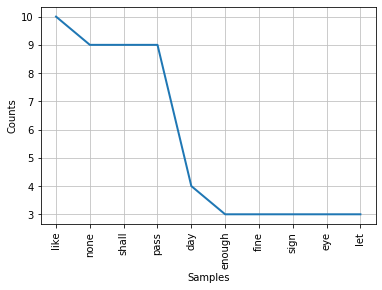

In [4]:
fd = FreqDist(data)
fd.plot(10)

The words "none shall pass" appear multiple times in each chorus, so their high ranking in the frequency list is not surprising.

In [5]:
fd.most_common(15)

[('like', 10),
 ('none', 9),
 ('shall', 9),
 ('pass', 9),
 ('day', 4),
 ('enough', 3),
 ('fine', 3),
 ('sign', 3),
 ('eye', 3),
 ('let', 3),
 ('remember', 3),
 ('name', 3),
 ('face', 3),
 ('judged', 3),
 ('funhouse', 3)]

### RAKE (Rapid Automatic Keyword Extraction)

RAKE short for Rapid Automatic Keyword Extraction algorithm, is a domain independent keyword extraction algorithm which tries to determine key phrases in a body of text by analyzing the frequency of word appearance and its co-occurance with other words in the text. [Source](https://github.com/csurfer/rake-nltk)

In [6]:
from rake_nltk import Rake

In [7]:
rake = Rake()
# rake.extract_keywords_from_sentences(data)
rake.extract_keywords_from_text(song) # Rake seems to work best with the unprocessed data
rake.get_ranked_phrases_with_scores()[:10]

[(25.0, 'cardboard city folk swap tales'),
 (25.0, 'actually beef blood turns wine'),
 (23.5, 'water wings colorfully vulgar poacher'),
 (23.0, 'little snake river canyon today'),
 (16.0, 'buttery gold jittery zeitgeist'),
 (14.5, 'war true blue triumph'),
 (14.166666666666666, 'play rollover fetch like'),
 (13.5, 'none shall pass ."'),
 (10.5, 'none shall pass'),
 (9.0, 'rogue vocoder blitz')]

### N-Gram Frequencies

While I have only found [one paper](https://www.researchgate.net/publication/272674061_Automatic_Keyword_Extraction_From_Any_Text_Document_Using_N-gram_Rigid_Collocation) on keyword extraction using bi-grams and N-grams, they could have application for our purposes.

In [8]:
bigrams = nltk.bigrams(data)
bg_fd = FreqDist(bigrams)
bg_fd.most_common(10)

[(('none', 'shall'), 9),
 (('shall', 'pass'), 9),
 (('pass', 'none'), 6),
 (('fine', 'sign'), 3),
 (('remember', 'name'), 3),
 (('name', 'face'), 3),
 (('face', 'day'), 3),
 (('day', 'judged'), 3),
 (('judged', 'funhouse'), 3),
 (('funhouse', 'cast'), 3)]

This [article](https://medium.com/reputation-com-datascience-blog/keywords-extraction-with-ngram-and-modified-skip-gram-based-on-spacy-14e5625fce23) demonstrates a keyword extraction algorithm using n-grams and "modified skip-grams". It may be worthwhile to reproduce the system in this article.

## TextRank

[Source](https://towardsdatascience.com/textrank-for-keyword-extraction-by-python-c0bae21bcec0)

In [9]:
from collections import OrderedDict
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')

In [10]:
class TextRankForKeyword():
    """Extract keywords from text"""
    def __init__(self):
        self.d = 0.85 # damping coefficient, usually is .85
        self.min_diff = 1e-5 # convergence threshold
        self.steps = 10 # iteration steps
        self.node_weight = None # save keywords and its weight

    def set_stopwords(self, stopwords):  
        """Set stop words"""
        for word in STOP_WORDS.union(set(stopwords)):
            lexeme = nlp.vocab[word]
            lexeme.is_stop = True
    
    def sentence_segment(self, doc, candidate_pos, lower):
        """Store those words only in cadidate_pos"""
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words only with cadidate POS tag
                if token.pos_ in candidate_pos and token.is_stop is False:
                    if lower is True:
                        selected_words.append(token.text.lower())
                    else:
                        selected_words.append(token.text)
            sentences.append(selected_words)
        return sentences
        
    def get_vocab(self, sentences):
        """Get all tokens"""
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1, i+window_size):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        # Build matrix
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
            
        # Get Symmeric matrix
        g = self.symmetrize(g)
        
        # Normalize matrix by column
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
        return g_norm

    
    def get_keywords(self, number=10):
        """Print top number keywords"""
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        for i, (key, value) in enumerate(node_weight.items()):
            print(key + ' - ' + str(value))
            if i > number:
                break
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):
        """Main function to analyze text"""
        
        # Set stop words
        self.set_stopwords(stopwords)
        
        # Pare text by spaCy
        doc = nlp(text)
        
        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight

In [11]:
textrank = TextRankForKeyword()
textrank.analyze(song)
textrank.get_keywords(10)

sign - 2.275466168091168
eye - 1.830317437815034
war - 1.820202117327117
day - 1.6412334467120182
prize - 1.6356643281931742
king - 1.5934580085868544
life - 1.5895065047666006
water - 1.467084328865579
patrol - 1.250513888888889
hole - 1.243076388888889
heart - 1.243076388888889
face - 1.2129230725623583


## Machine Learning

Machine learning approaches have been used for keyword extraction with some success. Hidden Markov models, naive Bayes, support vector machines (SVM), and bagging have been used for these purposes. However, these require labelled sets of training data, which may prove difficult for our purposes. Perhaps we could find a pre-trained model?